In [17]:
!pip install spacy --user
!python3 -m spacy download it_core_news_sm
!pip3 install -U spacy
!pip3 install spacy
!python -m spacy download it_core_news_sm

     |████████████████████████████████| 21.4 MB 1.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
     |████████████████████████████████| 21.4 MB 80.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')


In [18]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import pandas as pd
nltk.download('punkt')
import string
from spacy.lang.it.stop_words import STOP_WORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
df= pd.read_csv('Books.csv')
df

,Unnamed: 0,_id,author,contents,publishing house,year
0,0,Jane Eyre_Feltrinelli_pulito.txt,Charlotte Brontë,Quel giorno era impossibile uscire a passeggio...,Feltrinelli Editore,2014
1,1,Jane Eyre_Treves_pulito.txt,Charlotte Brontë,In quel giorno era impossibile passeggiare. La...,Fratelli Treves Editori,1904


In [20]:
df['Frasi']= df.apply(lambda row: nltk.sent_tokenize(row['contents']), axis=1)
import spacy
from spacy.lang.it.examples import sentences 
from tqdm.notebook import tqdm
tqdm.pandas()
nlp = spacy.load('it_core_news_sm')
nlp.max_length = 1064150 
pipe = nlp.pipe(df['contents'], n_process=2, batch_size=2000)

In [21]:
docs = [x for x in tqdm(pipe)]

0it [00:00, ?it/s]

In [22]:
df['spacy_doc'] = docs
df['POS_spacy'] = df['spacy_doc'].progress_apply(lambda x: [(y.text, y.pos_) for y in x])
df['lemmatized'] = df['spacy_doc'].progress_apply(lambda x: " ".join([y.lemma_ for y in x if len(x)>1]))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [23]:
df['Frasi2']= df.apply(lambda row: nltk.sent_tokenize(row['lemmatized']), axis=1)

import numpy as np
documents = list(np.array(df['Frasi2'][1]))
documents2 = list(np.array(df['Frasi2'][0]))

lemmi1 = pd.DataFrame(documents,columns={'text'})
lemmi2 = pd.DataFrame(documents2, columns={'text'})

In [24]:
lemmi1['Edition'] = '1'
lemmi2['Edition'] = '2'
lemmi = lemmi1.append(lemmi2, ignore_index=True)

In [25]:
lemmi

,text,Edition
0,in quello giorno essere impossibile passeggiare .,1
1,il mattina avere errare per uno ora nel bosche...,1
2,ne essere contentare .,1
3,non mi essere mai piacere il lungo passeggiate...,1
4,"eliza , John e georgiana essere aggruppare in ...",1
...,...,...
19797,il paura della morte non offuscare il ultimo o...,2
19798,"il suo stesso parola ne essere pegno : \n\n "" ...",2
19799,ogni giorno mi annunciare con sempre grande ch...,2
19800,", e di ora in ora io rispondere con fervore cr...",2


In [26]:
lemmi.to_csv('Lemmi.csv')

In [27]:
lemmi['documents_cleaned']= lemmi.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
data = list(lemmi['documents_cleaned'])

In [28]:
# Create Skip Gram model
w2v_model = gensim.models.Word2Vec(data, min_count = 1,size = 100, window = 5, sg=0) 
w2v_model.init_sims(replace=True)


w2v_model.save('word2vec_model_lemmi')
w2v_model = Word2Vec.load('word2vec_model_lemmi')

In [29]:
w2v_model.wv.most_similar(positive=["amore"])

[('risposta', 0.9821929931640625),
 ('sincerità', 0.9798619747161865),
 ('amico', 0.9791906476020813),
 ('cattivo', 0.9783332943916321),
 ('fame', 0.9782291650772095),
 ('reclamare', 0.9779578447341919),
 ('aiuto', 0.9765887260437012),
 ('negare', 0.9763490557670593),
 ('febbre', 0.9751891493797302),
 ('arrivare', 0.973852813243866)]

In [30]:
w2v_model.wv.most_similar(positive=["morte"])

[('fuga', 0.9839316606521606),
 ('villa', 0.9832829236984253),
 ('sangue', 0.9829274415969849),
 ('bugiardo', 0.9825474619865417),
 ('bambino', 0.9824259281158447),
 ('corpo', 0.9824188947677612),
 ('delizia', 0.981909453868866),
 ('nostro', 0.9818809032440186),
 ('carne', 0.9813880324363708),
 ('ritorno', 0.9809211492538452)]

In [31]:
w2v_model.wv.most_similar(positive=["gioia"])

[('felicità', 0.9949056506156921),
 ('coscienza', 0.9930375814437866),
 ('dolore', 0.9928925037384033),
 ('sorriso', 0.9918370842933655),
 ('passato', 0.990351676940918),
 ('manifestare', 0.9903090000152588),
 ('dolce', 0.9901694059371948),
 ('vanità', 0.9901127815246582),
 ('carattere', 0.9900801181793213),
 ('raggiungere', 0.9898024797439575)]

In [32]:
w2v_model.wv.similarity('pomeriggio','mattina')

0.9575319

In [33]:
distance = w2v_model.wv.wmdistance(data[0],data[8229])
distance

0.18520689833607984

In [34]:
distance = w2v_model.wv.wmdistance(data[2],data[8231])
distance

0.23595782591030004

In [35]:
distance = w2v_model.wv.wmdistance(data[3],data[8232])
distance

0.3706854612416485

In [36]:
distance = w2v_model.wv.wmdistance(data[5],data[8235])
distance

0.2828006459939553

In [37]:
distance = w2v_model.wv.wmdistance(data[0],data[8229])
distance

0.18520689833607984

In [38]:
distance = w2v_model.wv.wmdistance(data[0],data[8229])
distance

0.18520689833607984

In [39]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 150 missing from current font.
  fo

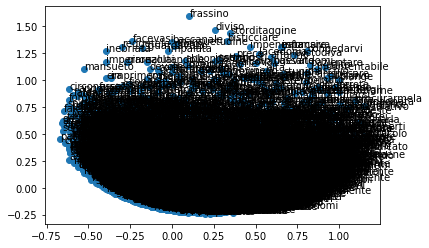

In [40]:
pca = PCA(n_components=2)
X = w2v_model[w2v_model.wv.vocab]
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(w2v_model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()



#DOC2VEC

In [41]:
sentences = lemmi['text']

In [42]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(lemmi["text"])]
model_d2v = Doc2Vec(vector_size=5, dbow_words=1, dm=0, epochs=30,  window=2, seed=1337, min_count=1, alpha=0.001, min_alpha=0.025)
model_d2v.build_vocab(tagged_data)
model_d2v.save('doc2vec_model_lemmi')
model_d2v.train(tagged_data, total_examples=model_d2v.corpus_count, epochs=5)

In [43]:
sims = model_d2v.docvecs.most_similar([model_d2v[0]], topn=40) 
sims

[(0, 0.9999999403953552),
 (17364, 0.9986203908920288),
 (5375, 0.9984692335128784),
 (12454, 0.9973165988922119),
 (13187, 0.9966259598731995),
 (16347, 0.9964333772659302),
 (9898, 0.9959605932235718),
 (3562, 0.9959354400634766),
 (6468, 0.9957622289657593),
 (996, 0.995717465877533),
 (16218, 0.9955762624740601),
 (8246, 0.9954731464385986),
 (255, 0.9950459599494934),
 (5702, 0.994956910610199),
 (365, 0.9948422908782959),
 (9618, 0.9947287440299988),
 (16020, 0.9946310520172119),
 (8189, 0.9946238994598389),
 (10964, 0.9945293664932251),
 (471, 0.9944912195205688),
 (17148, 0.9941713809967041),
 (10186, 0.9939867854118347),
 (2627, 0.993955671787262),
 (9728, 0.9939080476760864),
 (9042, 0.9936396479606628),
 (13104, 0.9936067461967468),
 (13762, 0.9934336543083191),
 (15930, 0.9934183359146118),
 (11455, 0.9933004379272461),
 (6198, 0.9930112361907959),
 (7804, 0.9929336309432983),
 (1925, 0.9928834438323975),
 (5629, 0.992836594581604),
 (7907, 0.9927332401275635),
 (10496, 0.9

In [44]:
sims = model_d2v.docvecs.most_similar([model_d2v[2]], topn=20) 
sims

[(2, 0.9999999403953552),
 (795, 0.9959399700164795),
 (112, 0.9947094917297363),
 (17452, 0.9928195476531982),
 (254, 0.9911460876464844),
 (17405, 0.9905238151550293),
 (18030, 0.9899877905845642),
 (19130, 0.9899448156356812),
 (16475, 0.9892578721046448),
 (10565, 0.9892029166221619),
 (7259, 0.9887567758560181),
 (9904, 0.9884312748908997),
 (17940, 0.9880381226539612),
 (1360, 0.9880281686782837),
 (255, 0.9878423810005188),
 (2571, 0.9878377914428711),
 (1925, 0.9870700240135193),
 (7847, 0.9865291118621826),
 (17266, 0.9857320189476013),
 (270, 0.9854963421821594)]

In [45]:
sims = model_d2v.docvecs.similarity((0), (8229))
sims

0.8949522

In [46]:
sims = model_d2v.docvecs.similarity((2), (8231)) 
sims

0.83207893

In [47]:
sims = model_d2v.docvecs.similarity((3), (8232)) 
sims

0.9213935

In [48]:
sims = model_d2v.docvecs.similarity((5), (8235)) 
sims

0.9398721

In [49]:
sims = model_d2v.docvecs.most_similar((5),topn = 20) 
sims

[(9629, 0.9995439648628235),
 (9941, 0.9993733763694763),
 (16278, 0.9993573427200317),
 (17924, 0.9992631673812866),
 (17376, 0.9990682005882263),
 (1192, 0.9990673065185547),
 (12384, 0.9990601539611816),
 (9236, 0.9990390539169312),
 (1970, 0.9988645911216736),
 (16577, 0.9988195896148682),
 (2117, 0.9986647963523865),
 (12313, 0.9986352920532227),
 (5624, 0.9985557198524475),
 (10933, 0.9985270500183105),
 (15400, 0.9984169602394104),
 (9328, 0.9983104467391968),
 (15095, 0.9982454180717468),
 (18182, 0.9982060790061951),
 (7343, 0.9980786442756653),
 (1796, 0.9979889988899231)]

In [50]:
sims = model_d2v.docvecs.most_similar([model_d2v[8235]],topn = 20) 
sims

[(8235, 1.0),
 (6495, 0.9994399547576904),
 (10483, 0.9990732669830322),
 (5529, 0.9988674521446228),
 (5834, 0.9982808232307434),
 (13820, 0.9980589151382446),
 (16063, 0.9979966878890991),
 (18069, 0.9970853328704834),
 (19772, 0.996902585029602),
 (18283, 0.9966303110122681),
 (12406, 0.996624767780304),
 (18080, 0.9961351752281189),
 (16676, 0.9959548711776733),
 (8706, 0.9958964586257935),
 (12512, 0.9958709478378296),
 (9367, 0.9958329796791077),
 (17112, 0.9956169724464417),
 (6195, 0.9954503774642944),
 (19364, 0.9948212504386902),
 (16111, 0.9945361018180847)]

In [51]:
#'Quel giorno era impossibile uscire a passeggio.'
# 'In quel giorno era impossibile passeggiare.'

distance = model_d2v.wv.wmdistance(lemmi["text"][0],lemmi["text"][8229])
distance

0.06442391370278037

In [52]:
#'Ne ero contenta.'
#'Ne fui felice.'

distance = model_d2v.wv.wmdistance(lemmi["text"][2],lemmi["text"][8231])
distance

0.2741659346746788

In [53]:
#'Quanto a me, mi aveva dispensata dall onere di unirmi al gruppo, dicendo che le rincresceva di dovermi tenere a distanza, ma finchÈ non avesse saputo da Bessie e visto con i suoi occhi che facevo seri sforzi per assumere un atteggiamento più socievole e adatto a una bambina scarlatta e a sinistra c erano le vetrate trasparenti che mi proteggevano, senza separarmene, da quella triste giornata di novembre.'
#'Ella mi aveva proibito di unirmi al loro gruppo, dicendo che deplorava la necessità in cui trovavasi di tenermi così lontana, ma che fino al momento in cui Bessie non guarentirebbe che mi studiavo di acquistare un carattere pi˘ socievole e pi˘ infantile, maniere pi˘ cortesi e qualcosa di pi˘ radioso, di più aperto, di più sincero, non poteva concedermi gli stessi privilegi che ai bambini allegri e soddisfatti.'

distance = model_d2v.wv.wmdistance(lemmi["text"][3],lemmi["text"][8232])
distance

0.15190838520812636

In [54]:
#'Non mi sono mai piaciute le lunghe passeggiate, sopra tutto col freddo, ed era cosa penosa per me di tornar di notte con le mani e i piedi gelati, col cuore amareggiato dalle sgridate di Bessie, la bambinaia, e con lo spirito abbattuto dalla coscienza della mia inferiorità fisica di fronte a Eliza, a John e a Georgiana Reed.'

#'Era terribile tornare a casa nel pungente freddo del crepuscolo, con mani e piedi gelati e il cuore intristito dai rimproveri di Bessie, la balia, e avvilita dalla consapevolezza della mia inferiorità fisica rispetto a Eliza, John e Georgiana Reed. '

distance = model_d2v.wv.wmdistance(lemmi["text"][5],lemmi["text"][8235])
distance

0.14284473539140366

#BERT

In [56]:
!pip install bert
!pip install pytorch_pretrained_bert
!pip install sent2vec
!pip install sentence_transformers

  Created wheel for bert: filename=bert-2.2.0-py3-none-any.whl size=3766 sha256=9ba07e9c3164986c311a92c4e19e30f4ec3ee52c7ea374600adddb62d9e64f36
  Stored in directory: /root/.cache/pip/wheels/bb/31/1b/c05f362e347429b7436954d1a2280fe464731e8f569123a848
  Created wheel for erlastic: filename=erlastic-2.0.0-py3-none-any.whl size=6795 sha256=78241e22ab7c1076607bed0349e3020928289c815a387511c6d74f904de935b1
  Stored in directory: /root/.cache/pip/wheels/94/f1/b4/0b98b1e94775da6a0b1130e342d22af05cd269e1172c19f40f
Successfully built bert erlastic
     |████████████████████████████████| 123 kB 5.3 MB/s 
     |████████████████████████████████| 131 kB 45.5 MB/s 
     |████████████████████████████████| 8.1 MB 54.4 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 138 kB 58.2 MB/s 
     |████████████████████████████████| 127 kB 60.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.

     |████████████████████████████████| 3.1 MB 5.2 MB/s 
     |████████████████████████████████| 895 kB 52.5 MB/s 
     |████████████████████████████████| 59 kB 6.8 MB/s 
     |████████████████████████████████| 3.3 MB 65.6 MB/s 
     |████████████████████████████████| 596 kB 73.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 78 kB 3.5 MB/s 
     |████████████████████████████████| 1.2 MB 10.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=cdbec22ffca63dec7e50087c5db350718235582d82fd3896fcf5097893ddbeb8
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


In [57]:
import tensorflow as tf
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [58]:
import torch#pytorch
from transformers import AutoTokenizer, AutoModel#for embeddings
from sklearn.metrics.pairwise import cosine_similarity#for similarity

#download pretrained model
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-italian-cased")
model = AutoModel.from_pretrained("dbmdz/bert-base-italian-cased",output_hidden_states=True)

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/230k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-base-italian-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [59]:
#create embeddings
def get_embeddings(text,token_length):
  tokens=tokenizer(text,max_length=token_length,padding='max_length',truncation=True)
  output=model(torch.tensor(tokens.input_ids).unsqueeze(0),
               attention_mask=torch.tensor(tokens.attention_mask).unsqueeze(0)).hidden_states[-1]
  return torch.mean(output,axis=1).detach().numpy()

In [60]:
#calculate similarity
def calculate_similarity(text1,text2,token_length=20):
    out1=get_embeddings(text1,token_length=token_length)#create embeddings of text
    out2=get_embeddings(text2,token_length=token_length)#create embeddings of text
    sim= cosine_similarity(out1,out2)[0][0]
    print(sim)

In [61]:
calculate_similarity(lemmi['text'][0],lemmi['text'][0])

1.0


In [62]:
calculate_similarity(lemmi['text'][2],lemmi['text'][8231])

0.881647


In [63]:
calculate_similarity(lemmi['text'][3],lemmi['text'][8232])

0.84311074


In [64]:
calculate_similarity(lemmi['text'][5],lemmi['text'][8235])

0.88196796


In [65]:
sent = list(i for i in lemmi.text)

In [66]:
embedding_bert = []
for i in sent:
  output_bert=get_embeddings(i,token_length=20)#create embeddings of text
  embedding_bert.append(output_bert)

In [67]:
import torch
torch.save(model, 'embedding_bert_lemmi')
embedding_bert = torch.load('embedding_bert_lemmi')